In [113]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import trapezoid, simpson, romberg, quad
import warnings
warnings.filterwarnings("ignore")

# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Soleil Dayana Niño Murcia
*Métodos computacionales 2024-II*

---

#1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$


In [ ]:
f1 = lambda x: 1/np.sqrt(np.tan(x))
a, b = 1e-3, np.pi/2

x = np.linspace(a, b, 100)

y1 = f1(x)

i_trap = trapezoid(y1, x)
i_simp = simpson(y=y1, x=x)

i_quad, error = quad(f1, 0, b)

print('Valor de la integral según el método:\n\nTrapezoidal:', i_trap, '\nSimpson:', i_simp, '\nQuad:', i_quad)

Valor de la integral según el método:

Trapezoidal: 2.2777169633373733 
Simpson: 2.2187515602037817 
Quad: 2.2214414690792026


$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$

In [ ]:
f2 = lambda x: np.cos(x)/x**3
a2, b2 = 1, np.inf

x = np.linspace(a2, b2, 100)
y2 = f2(x)

i_trap = trapezoid(y2, x)
i_simp = simpson(y=y2, x=x)

i_quad, error = quad(f2, a2, b2)

print('Valor de la integral según el método:\n\nTrapezoidal:', i_trap, '\nSimpson:', i_simp, '\nQuad:', i_quad)

Valor de la integral según el método:

Trapezoidal: nan 
Simpson: nan 
Quad: 0.01811792007976691


Los métodos trapezoidal y Simpson necesitan valores numéricos finitos para calcular la integral. Al encontrar valores inf o nan en y2, estos métodos fallan.
En lugar de usar como límite b2 = np.inf, puedo tomar un valor que represente un límite superior práctico.

In [ ]:
a2 = 1
b2_ = 100  # Limitar el rango superior a 100
num_points = 1000  # Aumentar el número de puntos

x = np.linspace(a2, b2_, num_points)
y2 = f2(x)

i_trap = trapezoid(y2, x)
i_simp = simpson(y=y2, x=x)

i_quad, error = quad(f2, a2, np.inf)  # quad sí puede manejar infinito

print('Valor de la integral según el método:\n\nTrapezoidal:', i_trap, '\nSimpson:', i_simp, '\nQuad:', i_quad)

Valor de la integral según el método:

Trapezoidal: 0.02012470585580027 
Simpson: 0.018146198374136516 
Quad: 0.01811792007976691


$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$


In [ ]:
from scipy.integrate import dblquad

f3 = lambda x, y: 1/np.sqrt(1-y**2)

# Límites de integración
c, d, a3, b3 = 0, np.pi/4, 0, lambda x : np.sin(x)

nx, ny = 1000, 1000

# Aplicamos el método del trapecio
hx = (d - c) / (nx - 1)
I_trapecio = 0
for i in range(nx):
    xi = x[i]
    ya, yb = a3, b3(xi)
    y_vals = np.linspace(ya, yb, ny)
    f_vals = f3(xi, y_vals)
    I_trapecio += np.trapz(f_vals, y_vals) * hx

# Aplicamos el método de Simpson
I_simpson = 0
for i in range(nx):
    xi = x[i]
    ya, yb = a3, b3(xi)
    y_vals = np.linspace(ya, yb, ny)
    f_vals = f3(xi, y_vals)
    I_simpson += simpson(f_vals, y_vals) * hx

# Opción double quad
resultado_quad, error_quad = dblquad(f3, c, d, a3, b3)

# Resultados
print(f"Método del trapecio: {I_trapecio}")
print(f"Método de Simpson: {I_simpson}")
print(f"Método dblquad: {resultado_quad} (error: {error_quad})")

Método del trapecio: 0.005949285671344181
Método de Simpson: 0.004514198650312358
Método dblquad: 0.36033449485443175 (error: 2.086185191196123e-11)


In [ ]:
# Note que los errores son menores al epsilon

#2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.



In [ ]:
vx = lambda t: np.piecewise( # np.piecewise para evaluar por tramos
    t,
    [t <= 5, t > 5],
    [lambda t: 4 * t, lambda t: 20 + (5 - t)**2]
)

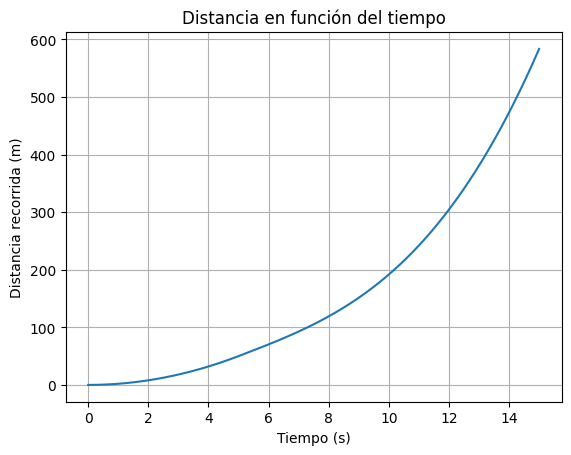

In [ ]:
t_lins = np.linspace(0, 15, 1000)
v_lins = vx(t_lins)

distance_lins = np.zeros_like(t_lins) # zeros_like sirve para que el tamaño del array sea el mismo que el de otro existente
for i in range(1, len(t_lins)):
    distance_lins[i] = trapezoid(v_lins[:i+1], t_lins[:i+1])

plt.plot(t_lins, distance_lins)
plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia recorrida (m)")
plt.title("Distancia en función del tiempo")
plt.grid()


* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.

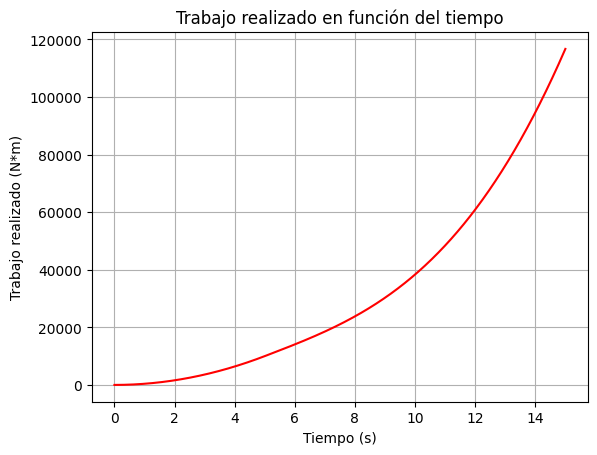

In [ ]:
F = 200
W = F * distance_lins

plt.plot(t_lins, W, color = 'red')
plt.xlabel("Tiempo (s)")
plt.ylabel("Trabajo realizado (N*m)")
plt.title("Trabajo realizado en función del tiempo")
plt.grid()

#3
La cantidad de masa transportada por una tuberia durante un periodo se puede calcular como

$$M = \int_{t_1}^{t_2} Q(t) c(t) \; dt$$

siendo M (masa en mg), $Q(t)$ el caudal y $c(t)$ concentración (mg/m$^3$). Sean las siguientes representaciones funcionales:

$$Q(t) = 9 + 5 \cos^2 (0.4t)$$
$$c(t) = 5e^{-0.5 t} + 2 e^{0.15 t}$$

Determine la masa transportada entre $t_1 = 2$ y $t_2 = 8 \mbox{ min}$ usando:

* Haga un gráfico del flujo y la concentración en función del tiempo.


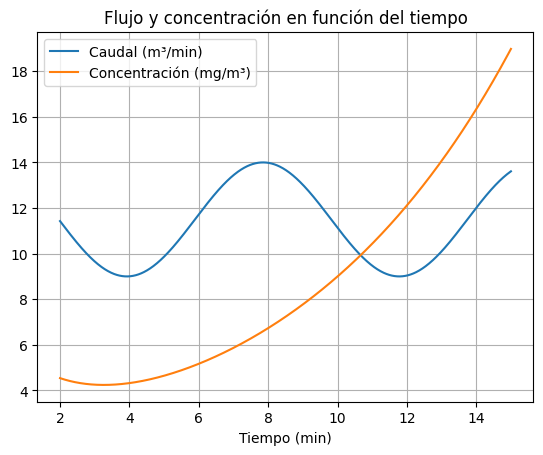

In [ ]:
t1, t2 = 2, 15

Q = lambda t: 9 + 5 * np.cos(0.4 * t)**2
c = lambda t: 5 * np.exp(-0.5 * t) + 2 * np.exp(0.15 * t)

t_lins = np.linspace(t1, t2, 1000)
Q_lins = Q(t_lins)
c_lins = c(t_lins)

plt.plot(t_lins, Q_lins, label = 'Caudal (m³/min)')
plt.plot(t_lins, c_lins, label = 'Concentración (mg/m³)')
plt.xlabel("Tiempo (min)")
plt.title("Flujo y concentración en función del tiempo")
plt.grid()
plt.legend()

* Determine el valor de la integral usando el método de integración de Romberg

In [ ]:
f = lambda t: Q(t)*c(t)

M = romberg(f, t1, t2)

In [ ]:
print(f"El valor de la masa transportada es: {M:.2f} mg")

El valor de la masa transportada es: 1256.06 mg


* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.

In [ ]:
masa, error = quad(f, t1, t2)
print(f"El valor obtenido por el método quad de la masa transportada es: {masa:.2f} mg")

El valor obtenido por el método quad de la masa transportada es: 1256.06 mg


In [ ]:
print(f"Los valores difieren en tan sólo {error:.2e} mg")
"""Es bastante confiable"""

Los valores difieren en tan sólo 6.19e-10 mg


'Es bastante confiable'

#4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [ ]:
f_phi = lambda phi: 1 / np.sqrt(1 - k **2 * np.sin(phi)**2)

g, b, I0, theta0 = 9.81, 2, 1, np.pi/3 # Parámetros iniciales
k = np.sin(theta0/2)
P0 = 2 * np.pi * np.sqrt(I0 / (g * b))


# Valor integral por simpson

phi_vals = np.linspace(0, np.pi/2, 1000)
y_vals = f_phi(phi_vals)

integral_simp = simpson(y_vals, phi_vals)
P_s =  integral_simp * 2 * P0 / np.pi

# Valor exacto de la integral por quad
i_exacta, e =  quad(f_phi, 0, np.pi/2)
P =  i_exacta * 2 * P0 / np.pi

print(f"El periodo de oscilación por quad es: {P:.4f} segundos, con un error de {e:.2e}")
print(f"El periodo de oscilación por simpson es: {P_s:.4f} segundos")

El periodo de oscilación por quad es: 1.5223 segundos, con un error de 1.87e-14
El periodo de oscilación por simpson es: 1.5223 segundos


In [ ]:
# Error relativo porcentual
error_r = abs(P_s - P) / P * 100
print(f"El error relativo porcentual es: {error_r:.4f}%")

El error relativo porcentual es: 0.0000%


#5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm.


In [ ]:
f = lambda t: 22.8 / (3.5 + 7 * (t - 1.25)**4)

# Límites de integración (de 4 pm a 6 pm, es decir, t = 0 a t = 2)
t1, t2 = 0, 2

total_autos, error_2 = quad(f, t1, t2)

# Mostrar el resultado
print(f"El número total de autos que cruzan el puente entre las 4 y las 6 pm es de {total_autos:.1f} autos")

El número total de autos que cruzan el puente entre las 4 y las 6 pm es de 10.0 autos


Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.

In [ ]:
print(f"El error de quad es de {error_2:.2e}")
# Error relativo porcentual
relative_error = abs(error_2 / total_autos) * 100

if relative_error < 5:
  print(f"La estimación del error relativo porcentual ({relative_error:.2f}%) es menor que el 5%.")
else:
  print(f"La estimación del error relativo porcentual ({relative_error:.2f}%) es mayor que el 5%.")

El error de quad es de 2.90e-10
La estimación del error relativo porcentual (0.00%) es menor que el 5%.


#6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ0∕4π$ = 1, calcular y graficar:

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


Text(0.5, 1.0, 'Componente $\\phi$ del potencial vectorial $A_\\phi(r=1.1, \\theta)$')

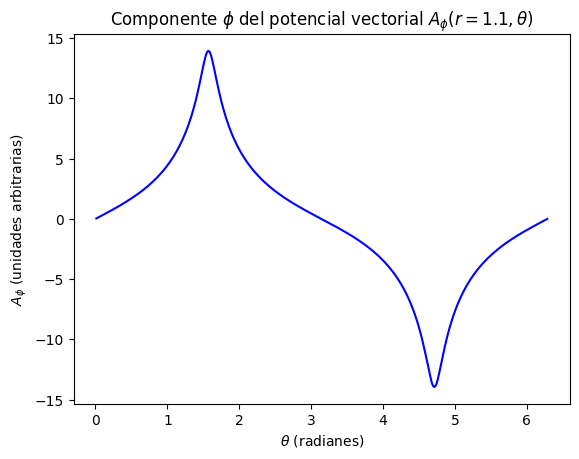

In [116]:
# USANDO DE LA LIBRERIA
mu0_4pi = 1
a = 1
I = 3

from scipy.special import ellipk, ellipe

def A_phi(theta, r):
    # Calcular k^2
    k_squared = (4 * a * r * np.sin(theta)) / (a**2 + r**2 + 2 * a * r * np.sin(theta))

    # Evalua K(k) y E(k)
    K_k = ellipk(k_squared)  # Integral elíptica completa del primer tipo
    E_k = ellipe(k_squared)  # Integral elíptica completa del segundo tipo

    # Calcula A_phi
    term1 = (2 - k_squared) * K_k
    term2 = -2 * E_k
    A_phi_value = mu0_4pi * 4 * I * a / np.sqrt(a**2 + r**2 + 2 * a * r * np.sin(theta)) * ((term1 + term2) / k_squared)

    return A_phi_value

# valores de θ y calcular Aφ
theta_vals = np.linspace(0, 2*np.pi, 500)  # θ entre 0 y 2π
A_phi_vals = np.array([A_phi(theta, 1.1) for theta in theta_vals])

plt.plot(theta_vals, A_phi_vals, label=r"$A_\phi(r=1.1, \theta)$", color='blue')
plt.xlabel(r"$\theta$ (radianes)")
plt.ylabel(r"$A_\phi$ (unidades arbitrarias)")
plt.title(r"Componente $\phi$ del potencial vectorial $A_\phi(r=1.1, \theta)$")

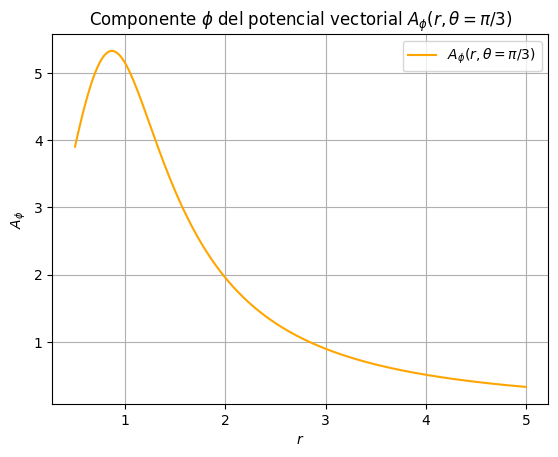

In [117]:
theta_3 = np.pi / 3  # Valor fijo de θ (π/3)
# valores de r y calcular Aφ
r_vals = np.linspace(0.5, 5, 500)  # r entre 0.5 y 50
A_phi_vals = np.array([A_phi(theta_3, r) for r in r_vals])

plt.plot(r_vals, A_phi_vals, label=r"$A_\phi(r, \theta=\pi/3)$", color='orange')
plt.xlabel(r"$r$")
plt.ylabel(r"$A_\phi$")
plt.title(r"Componente $\phi$ del potencial vectorial $A_\phi(r, \theta=\pi/3)$")
plt.legend()
plt.grid()
plt.show()